In [124]:
import pandas as pd
from vega import VegaLite

In [125]:
data_dir = "../results"

In [181]:
def load_data ():
    df = pd.read_csv(f"{data_dir}/big-run-all-results.csv")
    return df

In [182]:
df = load_data()

In [183]:
# Average over epochs
df = df.groupby(["epochs", "size", "method"], as_index=False).mean()

dff = pd.merge( df[df.method == "argmax"]
        , df[df.method == "sampling"]
        , left_on  =["epochs", "seed", "size"]
        , right_on =["epochs", "seed", "size"]
        , suffixes=["_argmax", "_sampling"]
        ).drop(columns=["method_argmax", "method_sampling"])
dff

,epochs,size,ft_acc_argmax,seed,sp_acc_argmax,ft_acc_sampling,sp_acc_sampling
0,1,1,0.485714,3,0.492857,0.455714,0.531429
1,1,2,0.524286,3,0.470000,0.502857,0.510000
2,1,5,0.592857,3,0.565714,0.515714,0.492857
3,1,10,0.550000,3,0.580000,0.560000,0.518571
4,1,20,0.721429,3,0.590000,0.581429,0.555714
5,1,30,0.838571,3,0.635714,0.702857,0.655714
6,1,40,0.877143,3,0.671429,0.695714,0.678571
7,1,50,0.794286,3,0.667143,0.761429,0.714286
8,1,60,0.802857,3,0.777143,0.805714,0.737143
9,1,70,0.874286,3,0.795714,0.802857,0.767143


In [192]:
def view_graph (df, prefix="ft"):
    g = VegaLite({
          "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
          "width": 700, "height": 400,
          "layer": 
            [
            # Finetuning (all variables)
            # Argmax
              { "mark": { "type": "line", "interpolate": "basis" },
                "encoding": {
                "x":       {"field": "size",   "type": "quantitative", "axis": {"title": "Size"}},
                "y":       {"field": f"{prefix}_acc_argmax"
                           , "type": "quantitative", "axis": {"title": "Accuracy"}
                           , "scale": { "domain": [0.5, 1] }},
                "color":   {"field": "epochs", "type": "nominal"},
                "tooltip": {"field": "method", "type": "nominal"}
              }      
            }

            # Specialisation (last layer only)
            # Sampling
            , { "mark": { "type": "line", "interpolate": "basis", "strokeDash": [4,4] },
                "encoding": {
                "x":       {"field": "size",   "type": "quantitative", "axis": {"title": "Size"}},
                "y":       {"field": f"{prefix}_acc_sampling"
                           , "type": "quantitative", "axis": {"title": "Accuracy"}
                           , "scale": { "domain": [0.5, 1] }},
                "color":   {"field": "epochs", "type": "nominal"},
                "tooltip": {"field": "method", "type": "nominal"}
              }
            }
          ]

        }, df)
    return g


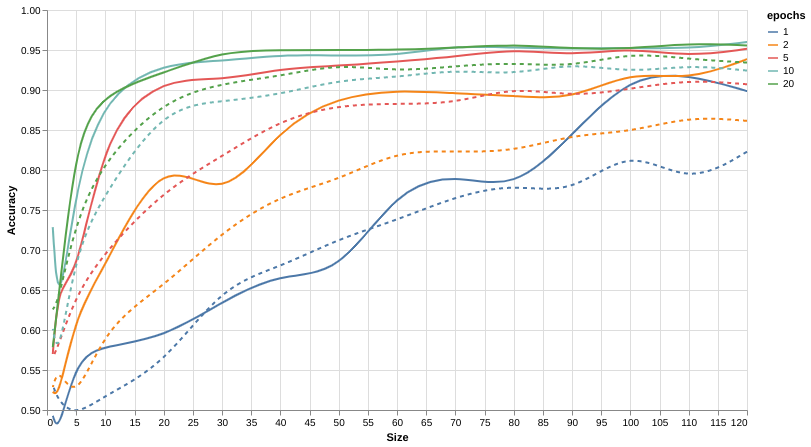

In [193]:
view_graph(dff, prefix="sp")

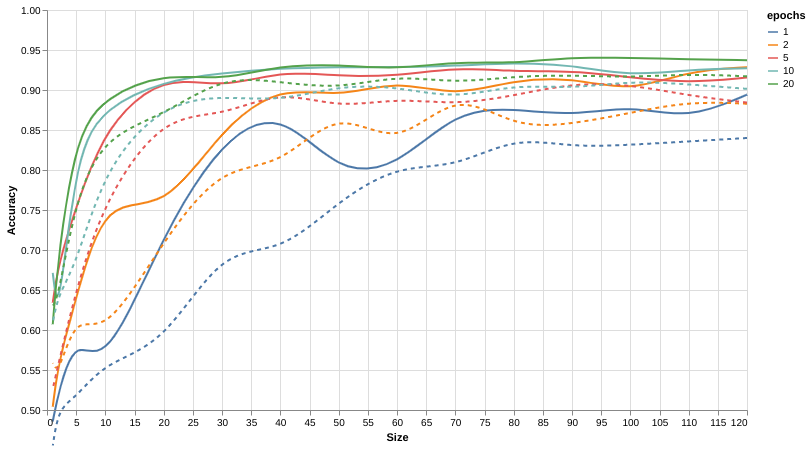

In [194]:
view_graph(dff, prefix="ft")